In [1]:
from qutip import *

In [2]:
import sys 
import os
sys.path.append(os.path.abspath("C:\Users\User\Documents\GitHub/colormap/"))
import colormaps as cmaps


In [3]:
import numpy as np
import scipy.constants as cs
import scipy.special as ss
from matplotlib import pyplot as plt
from matplotlib import cm
sys.path.append(os.path.abspath("C:\Users\User\Documents\Github/"))
from qkit.qkit.gui.notebook.Progress_Bar import Progress_Bar as pb
from scipy.integrate import dblquad
from scipy import integrate

%matplotlib inline

In [4]:
#customized plots:
import matplotlib 
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
matplotlib.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (8.0,5.0)
matplotlib.rcParams['savefig.dpi'] = 100
matplotlib.rcParams['legend.shadow'] = False
matplotlib.rcParams['savefig.bbox'] = 'tight'


cmap_virdis = cmaps.viridis.colors


In [5]:
labelsize = 27

In [6]:
mu_0 = cs.mu_0
mu_B = cs.physical_constants['Bohr magneton'][0]   #Bohr magneton in SI units
k_b = cs.k

In [7]:
wc = 1.0  * 2 * np.pi   # cavity frequency
#wa = 1.0  * 2 * np.pi  # atom frequency
#g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 5 * 10**-4          # cavity dissipation rate
gamma = 0.00           # atom dissipation rate
alpha = 2
N = 3*alpha                # number of cavity fock states
n_th_a = 0.0           # temperature in frequency units
use_rwa = True

tlist = np.linspace(0,1000,300)



In [8]:
# intial state
psi0 = tensor(basis(N,0))    # start with a cavity in vacuum state

# operators
a  = tensor(destroy(N))

In [9]:
wp = wc
#xi = -100
xi = -1000*kappa

print 'K = {} MHz; k = {} kHz'.format(xi, kappa)

K = -0.5 MHz; k = 0.0005 kHz


In [10]:
print 'quality factor: Q = kappa/w = {}'.format(wc/kappa)

quality factor: Q = kappa/w = 12566.3706144


In [11]:
H0 = wc*a.dag()*a + xi * a.dag() * a.dag() * a * a 

In [12]:
H1 = np.sqrt(kappa)/2.*np.conjugate(alpha)*a
def H1_coeff(t, args):
        return np.exp(+1j*2*np.pi*t)
        #return np.cos(2.*np.pi*t)

H2 = np.sqrt(kappa)/2.*alpha*a.dag()
def H2_coeff(t, args):
        return np.exp(-1j*2*np.pi*t)

In [13]:
H = [H0, [H1,H1_coeff], [H2,H2_coeff]]
#H = [H0, [H1,H1_coeff]]
#H = [H0, [H1,np.sin(wp*tlist)]]

In [14]:
c_op_list = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append((np.sqrt(rate) * a + alpha))

#rate = kappa * n_th_a
#if rate > 0.0:
#    c_op_list.append(np.sqrt(rate) * a.dag())

In [15]:
#mesolve?

In [16]:
output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a], options=Options(nsteps=100000), progress_bar = True)

10.0%. Run time:   2.16s. Est. time left: 00:00:00:19
20.0%. Run time:   4.06s. Est. time left: 00:00:00:16
30.0%. Run time:   5.95s. Est. time left: 00:00:00:13
40.0%. Run time:   7.91s. Est. time left: 00:00:00:11
50.0%. Run time:   9.86s. Est. time left: 00:00:00:09
60.0%. Run time:  11.79s. Est. time left: 00:00:00:07
70.0%. Run time:  13.74s. Est. time left: 00:00:00:05
80.0%. Run time:  15.66s. Est. time left: 00:00:00:03
90.0%. Run time:  17.59s. Est. time left: 00:00:00:01
Total run time:  19.40s


In [17]:
#output2 = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a], options=Options(nsteps=100000))

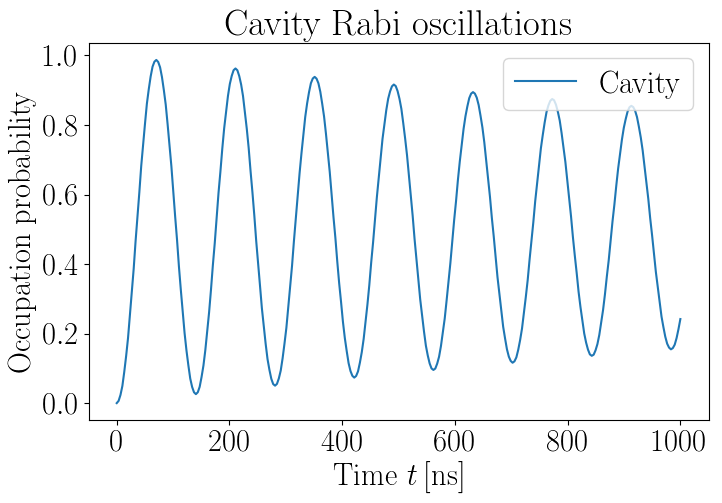

In [18]:


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output.expect[0], label="Cavity")
ax.legend()
ax.set_xlabel(r'$\mathrm{Time}\,\,t\,\mathrm{[ns]}$')
ax.set_ylabel('Occupation probability')
ax.set_title('Cavity Rabi oscillations')




In [19]:
tlist = np.linspace(0,400,300)

In [20]:
wc = 1.0  * 2 * np.pi   # cavity frequency
#wa = 1.0  * 2 * np.pi  # atom frequency
#g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 5 * 10**-4          # cavity dissipation rate
gamma = 0.00           # atom dissipation rate
alpha = 5
N = 3*alpha                # number of cavity fock states
n_th_a = 0.0           # temperature in frequency units
use_rwa = True

In [21]:
# intial state
psi0 = tensor(basis(N,0))    # start with a cavity in vacuum state

# operators
a  = tensor(destroy(N))

In [22]:
out = []
for alpha in [2,5,10]:
    for k in [10,100,1000]:
        xi = -k*kappa
        H0 = wc*a.dag()*a + xi * a.dag() * a.dag() * a * a 
        H1 = np.sqrt(kappa)/2.*np.conjugate(alpha)*a
        def H1_coeff(t, args):
            return np.exp(+1j*2*np.pi*t)
            #return np.cos(2.*np.pi*t)

        H2 = np.sqrt(kappa)/2.*alpha*a.dag()
        def H2_coeff(t, args):
            return np.exp(-1j*2*np.pi*t)

        H = [H0, [H1,H1_coeff], [H2,H2_coeff]]

        c_op_list = []

        rate = kappa * (1 + n_th_a)
        if rate > 0.0:
            c_op_list.append((np.sqrt(rate) * a + alpha))

        #rate = kappa * n_th_a
        #if rate > 0.0:
        #    c_op_list.append(np.sqrt(rate) * a.dag())

        out.append(mesolve(H, psi0, tlist, c_op_list, [a.dag() * a], options=Options(nsteps=100000), progress_bar = True))

10.0%. Run time:   2.96s. Est. time left: 00:00:00:26
20.0%. Run time:   6.13s. Est. time left: 00:00:00:24
30.0%. Run time:   9.23s. Est. time left: 00:00:00:21
40.0%. Run time:  12.31s. Est. time left: 00:00:00:18
50.0%. Run time:  15.30s. Est. time left: 00:00:00:15
60.0%. Run time:  18.27s. Est. time left: 00:00:00:12
70.0%. Run time:  21.42s. Est. time left: 00:00:00:09
80.0%. Run time:  24.65s. Est. time left: 00:00:00:06
90.0%. Run time:  27.74s. Est. time left: 00:00:00:03
Total run time:  30.68s
10.0%. Run time:   2.86s. Est. time left: 00:00:00:25
20.0%. Run time:   5.68s. Est. time left: 00:00:00:22
30.0%. Run time:   8.59s. Est. time left: 00:00:00:20
40.0%. Run time:  11.40s. Est. time left: 00:00:00:17
50.0%. Run time:  14.11s. Est. time left: 00:00:00:14
60.0%. Run time:  16.81s. Est. time left: 00:00:00:11
70.0%. Run time:  19.54s. Est. time left: 00:00:00:08
80.0%. Run time:  22.36s. Est. time left: 00:00:00:05
90.0%. Run time:  25.12s. Est. time left: 00:00:00:02
Tota

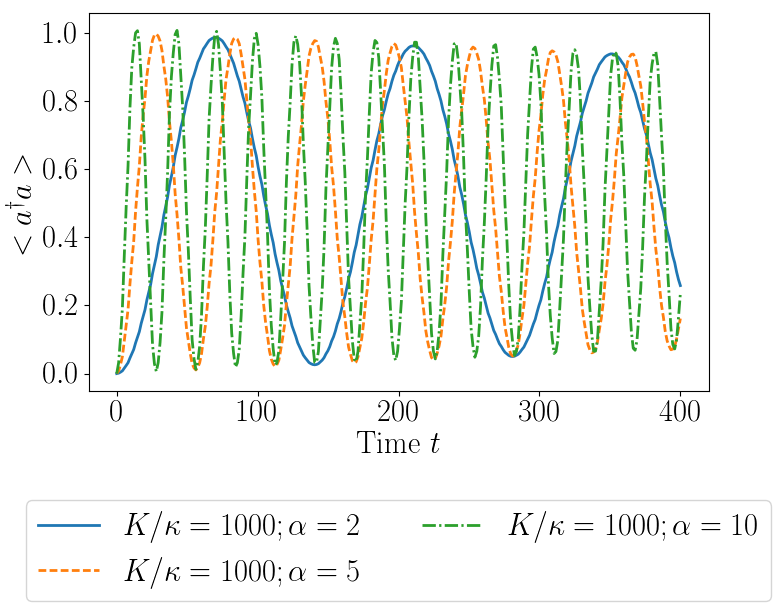

In [23]:

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, out[2].expect[0], label=r'$K/\kappa = 1000; \alpha = 2$', lw = 2)
ax.plot(tlist, out[5].expect[0], label=r'$K/\kappa = 1000; \alpha = 5$', lw = 2, ls = '--')
ax.plot(tlist, out[8].expect[0], label=r'$K/\kappa = 1000;  \alpha = 10$', lw = 2, ls = '-.')
ax.set_xlabel(r'$\mathrm{Time}\,\,t$')
ax.set_ylabel(r'$<a^\dagger a>$')
#ax.set_title(r'$K\,=\,{}\,\mathrm{{MHz}};\,\,\kappa\,=\,{}\,\mathrm{{kHz}}$'.format(xi,kappa));
ax.legend(loc = 'upper center',ncol = 2,  bbox_to_anchor = (0.5,-0.25))



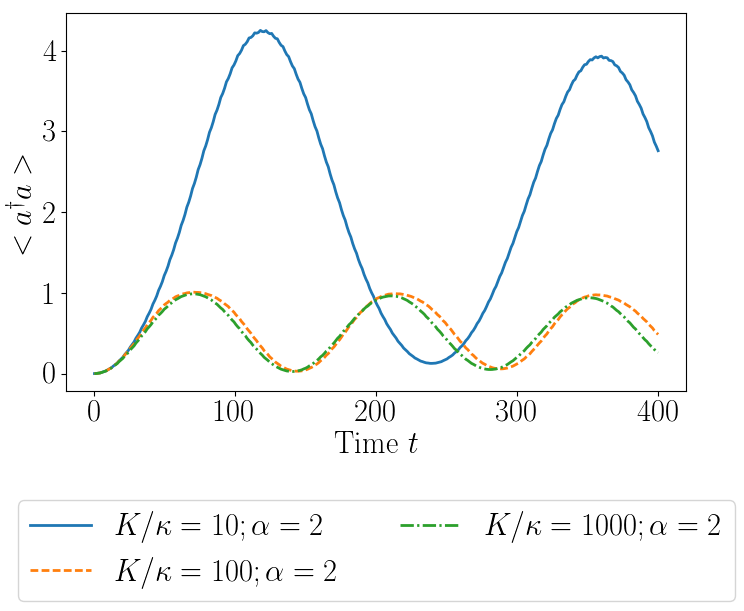

In [24]:


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, out[0].expect[0], label=r'$K/\kappa = 10; \alpha = 2$', lw = 2)
ax.plot(tlist, out[1].expect[0], label=r'$K/\kappa = 100; \alpha = 2$', lw = 2, ls = '--')
ax.plot(tlist, out[2].expect[0], label=r'$K/\kappa = 1000;  \alpha = 2$', lw = 2, ls = '-.')
ax.set_xlabel(r'$\mathrm{Time}\,\,t$')
ax.set_ylabel(r'$<a^\dagger a>$')
#ax.set_title(r'$K\,=\,{}\,\mathrm{{MHz}};\,\,\kappa\,=\,{}\,\mathrm{{kHz}}$'.format(xi,kappa));
ax.legend(loc = 'upper center',ncol = 2,  bbox_to_anchor = (0.5,-0.25))



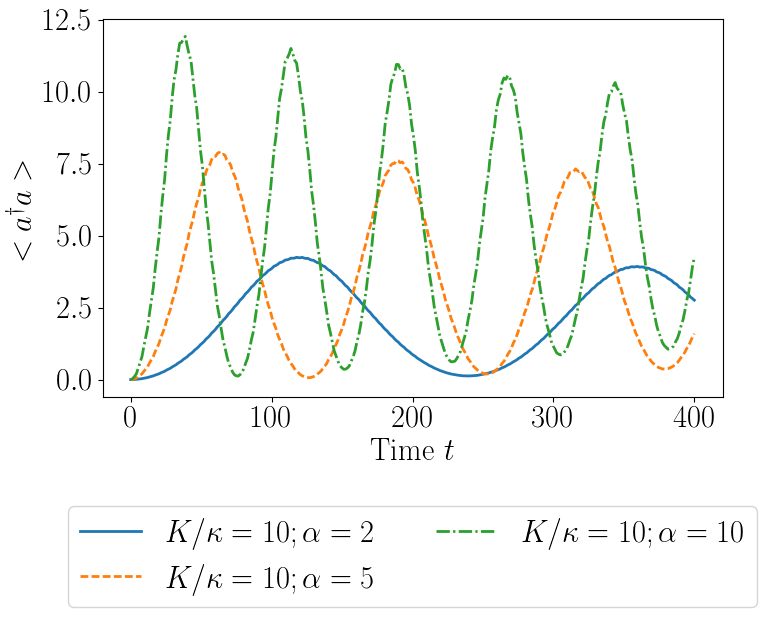

In [25]:


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, out[0].expect[0], label=r'$K/\kappa = 10; \alpha = 2$', lw = 2)
ax.plot(tlist, out[3].expect[0], label=r'$K/\kappa = 10; \alpha = 5$', lw = 2, ls = '--')
ax.plot(tlist, out[6].expect[0], label=r'$K/\kappa = 10;  \alpha = 10$', lw = 2, ls = '-.')
ax.set_xlabel(r'$\mathrm{Time}\,\,t$')
ax.set_ylabel(r'$<a^\dagger a>$')
#ax.set_title(r'$K\,=\,{}\,\mathrm{{MHz}};\,\,\kappa\,=\,{}\,\mathrm{{kHz}}$'.format(xi,kappa));
ax.legend(loc = 'upper center',ncol = 2,  bbox_to_anchor = (0.5,-0.25))



In [26]:


wc = 1.0  * 2 * np.pi  # cavity frequency
wa = 1.0  * 2 * np.pi  # atom frequency
g  = 0.05 * 2 * np.pi  # coupling strength
kappa = 0.005          # cavity dissipation rate
gamma = 0.05           # atom dissipation rate
N = 15                 # number of cavity fock states
n_th_a = 0.0           # temperature in frequency units
use_rwa = True

tlist = np.linspace(0,25,100)



In [27]:


# intial state
psi0 = tensor(basis(N,0), basis(2,1))    # start with an excited atom

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# Hamiltonian
if use_rwa:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() * sm + a * sm.dag())
else:
    H = wc * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * (sm + sm.dag())



In [28]:


c_op_list = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * a.dag())

rate = gamma
if rate > 0.0:
    c_op_list.append(np.sqrt(rate) * sm)



In [29]:
output = mesolve(H, psi0, tlist, c_op_list, [a.dag() * a, sm.dag() * sm])

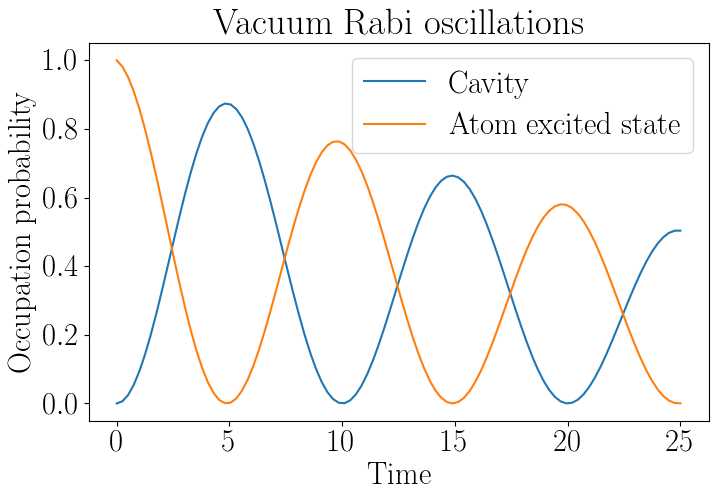

In [30]:


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output.expect[0], label="Cavity")
ax.plot(tlist, output.expect[1], label="Atom excited state")
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations');



In [31]:
def GAMMA(kappa,gamma,alpha_in,, K):
    tau = kappa + gamma
    alpha_in_tilde = np.sqrt(kappa)*alpha_in/tau
    delta = (omega_p - omega_0)/tau
    epsilon= np.abs(alpha_in_tilde)**2.*K/tau
    n = np.abs(alpha)**2./np.abs(alpha_in_tilde)**2.
    return (kappa/tau)*1/(0.5-i*delta+i*epsilon*n)-1.

SyntaxError: invalid syntax (<ipython-input-31-06100868d544>, line 1)